# Esercitazione di Laboratorio n. 5

#### Autore: Davide Cernuzio

### Parte III: Campo Elettrico di N Cariche Puntiformi in 2D

Considerare due cariche puntiformi $Q$ e $-Q$ ad una distanza $d$ e tracciare le linee di campo elettrico disegnando al punto $(x,y)$ un segmento tra i punti

- $\displaystyle \left( x - \frac{c}{2} \; \frac{E_x}{E}, y - \frac{c}{2} \; \frac{E_y}{E} \right)$



- $\displaystyle \left( x + \frac{c}{2} \; \frac{E_x}{E}, y + \frac{c}{2} \; \frac{E_y}{E} \right)$

dove $c$ è una costante che determina la lunghezza del segmento. Per costruzione, il segmento è centrato in $(x,y)$, ha la direzione di $\vec{E}$ e la sua lunghezza è pari a $c$.

Generalizzare il programma al caso di $n$ cariche puntiformi di posizioni $(x_1,y_1), \cdots, (x_n, y_n)$ e valori $q_1, \cdots, q_n$ dati.

# 

Nel presente programma si utilizzerà la funzione `plt.streamplot` della libreria `matplotlib.pyplot`.

Sia $\{ q_i \}$ una distribuzione discreta di $n$ cariche di posizioni $\{(x_i, y_i)\}$. Sia $\vec{r} \equiv (x,y)$ un punto del piano diverso dalle $\vec{r}_i \equiv (x_i, y_i)$. È noto che il campo elettrico $\vec{E}(\vec{r})$ è dato da

$\displaystyle \vec{E}(\vec{r}) = \sum_{i=1}^{n} \vec{E}_i(\vec{r}) = k \; \sum_{i=1}^n \frac{q_i}{|\vec{r} - \vec{r}_i|^3} \; \left( \vec{r} - \vec{r}_i \right) \;\;\;$ essendo $\displaystyle k \equiv \frac{1}{4\pi\varepsilon_0} \sim 8,988 \cdot 10^9 \; N \; \frac{m^2}{C^2}$

Proiettando lungo le direzioni $\hat{x}, \hat{y}$, otteniamo le due componenti del campo:

$ \displaystyle E_x(x, y) = k \sum_{i=1}^n \; q_i \; \frac{x - x_i}{\left[ (x-x_i)^2 + (y-y_i)^2 \right]^{3/2}} \\
  \displaystyle E_y(x, y) = k \sum_{i=1}^n \; q_i \; \frac{y - y_i}{\left[ (x-x_i)^2 + (y-y_i)^2 \right]^{3/2}} $

Nel caso specifico $n=2$ risulta

$ \displaystyle E_x(x, y) = k \left( q_1 \; \frac{x-x_1}{\left[ (x-x_1)^2 + (y-y_1)^2 \right]^{3/2}} + q_2 \; \frac{x-x_2}{\left[ (x-x_2)^2 + (y-y_2)^2 \right]^{3/2}} \right) \\
  \displaystyle E_y(x, y) = k \left( q_1 \; \frac{y-y_1}{\left[ (x-x_1)^2 + (y-y_1)^2 \right]^{3/2}} + q_2 \; \frac{y-y_2}{\left[ (x-x_2)^2 + (y-y_2)^2 \right]^{3/2}} \right)$

Nella rappresentazione del campo vettoriale di `streamplot`, le linee di campo non cambiano al variare della scala di $\vec{E}$. Ciò vuol dire che nel programma possiamo porre per comodità $k \equiv 1$, mentre le cariche possiamo sceglierle dell'ordine del coulomb anziché della carica elementare.

Lo stesso ragionamento si può applicare al potenziale elettrostatico:

$\displaystyle V(\vec{r}) \equiv V(x,y) = \sum_{i=1}^n \; V_i(x,y) = k \sum_{i=1}^n \; \frac{q_i}{|\vec{r}-\vec{r}_i|^2} = k \sum_{i=1}^n \; \frac{q_i}{\sqrt{\left( x-x_i)^2 + (y-y_i^2 \right)}}$

Nel caso $n=2$:

$\displaystyle V(x,y) = k \left( \frac{q_1}{\sqrt{(x-x_1)^2 + (y-y_1)^2}} + \frac{q_2}{\sqrt{(x-x_2)^2 + (y-y_2)^2}}  \right)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
t=time()

x1, x2 = +5, -5
y1, y2 =  0,  0
q1     = 1


q2       = -q1
x_m, x_M = min(x1, x2), max(x1, x2)
y_m, y_M = min(y1, y2), max(y1, y2)
Δx = x_M - x_m
Δy = y_M - y_m

if Δx==0:
    Δx=20
if Δy==0:
    Δy=20


x = np.linspace(x_m - Δx/2, x_M + Δx/2, 200)
y = np.linspace(y_m - Δy/2, y_M + Δy/2, 200)
X_array, Y_array = np.meshgrid(x,y)

def Ex(x,y):
    if (x,y)==(x1,y1) or (x,y)==(x2,y2):
        return np.nan
    return q1*(x - x1)/((x - x1)**2 + (y - y1)**2)**(3/2) + q2*(x - x2)/((x - x2)**2 + (y - y2)**2)**(3/2)

def Ey(x,y):
    if (x,y)==(x1,y1) or (x,y)==(x2,y2):
        return np.nan
    return q1*(y - y1)/((x - x1)**2 + (y - y1)**2)**(3/2) + q2*(y - y2)/((x - x2)**2 + (y - y2)**2)**(3/2)

def V(x,y):
    if (x,y)==(x1,y1) or (x,y)==(x2,y2):
        return np.nan
    return q1/np.sqrt((x - x1)**2 + (y - y1)**2) + q2/np.sqrt((x - x2)**2 + (y - y2)**2)

Ex, Ey, V = np.vectorize(Ex), np.vectorize(Ey), np.vectorize(V)
Ex_array  = Ex(X_array, Y_array)
Ey_array  = Ey(X_array, Y_array)
V_array   =  V(X_array, Y_array)

t=time()-t
print('Tempo di esecuzione:','{0:.3g}'.format(t),'s')

Tempo di esecuzione: 0.327 s


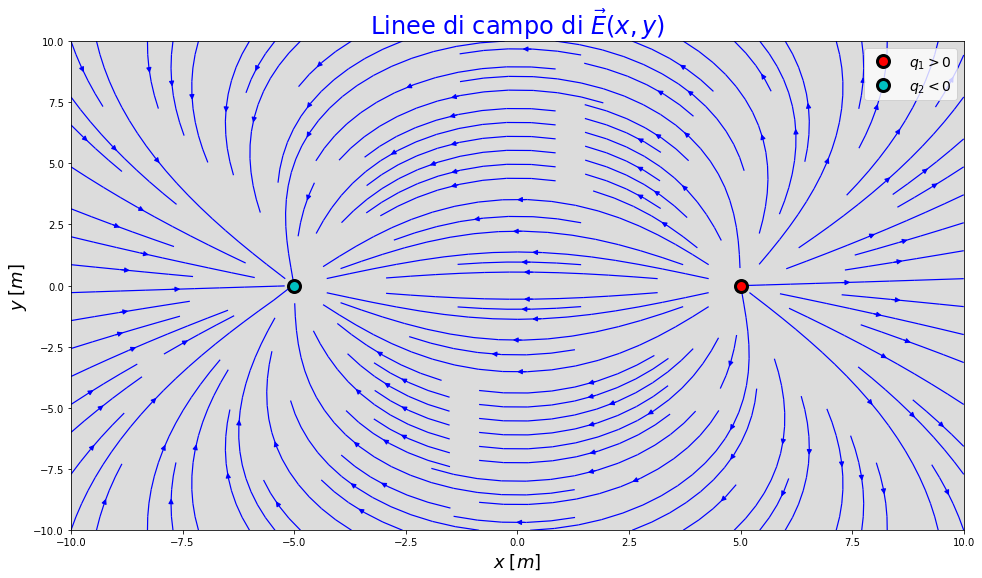

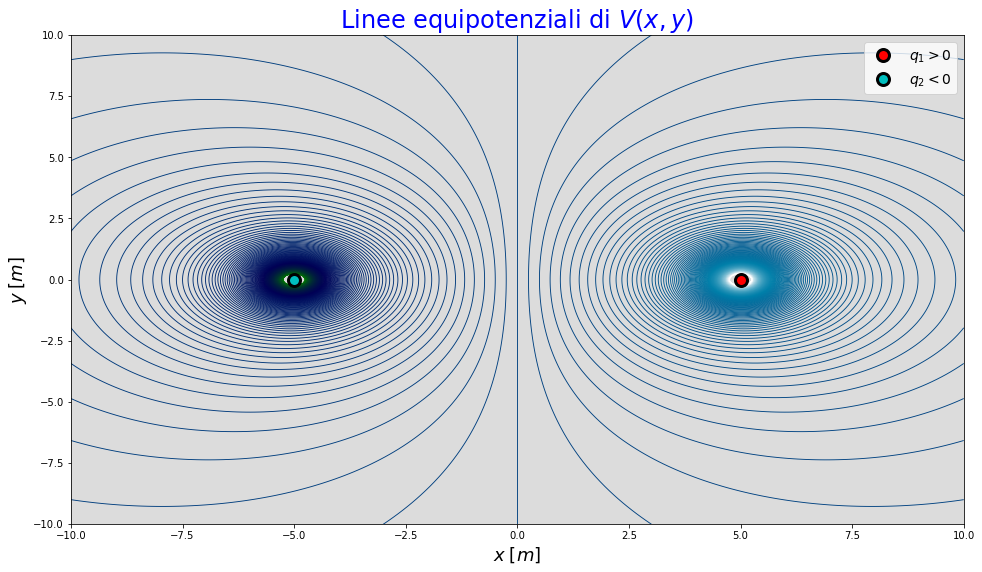

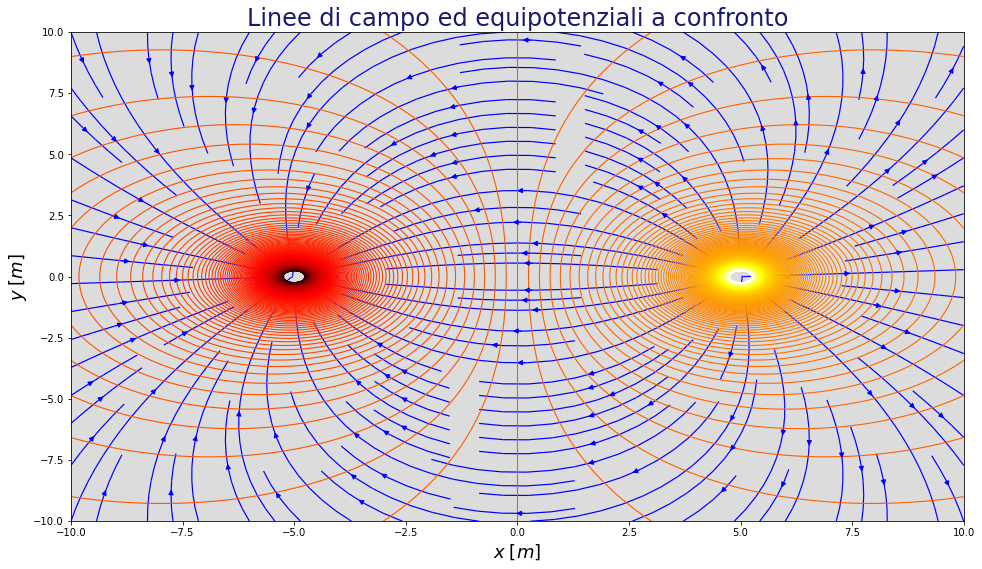

Tempo di esecuzione: 5.51 s


In [2]:
t=time()-t

plt.figure(figsize=(16, 9))
plt.axes().set_facecolor('gainsboro')
plt.title(r'Linee di campo di $\vec{E}(x,y)$', c='b', size=24)

plt.streamplot(X_array, Y_array, Ex_array, Ey_array, density=1.2, linewidth=1.2, color='b')
if q1>0:
    plt.plot(x1, y1, ' or', ms=12, mec='k', mew=3, label=r'$q_1 > 0$')
    plt.plot(x2, y2, ' oc', ms=12, mec='k', mew=3, label=r'$q_2 < 0$')
elif q1<0:
    plt.plot(x1, y1, ' oc', ms=12, mec='k', mew=3, label=r'$q_1 < 0$')
    plt.plot(x2, y2, ' or', ms=12, mec='k', mew=3, label=r'$q_2 > 0$')
else:
    plt.plot(x1, y1, ' ow', ms=12, mec='k', mew=3, label=r'$q_1 = q_2 = 0$')
    plt.plot(x2, y2, ' ow', ms=12, mec='k', mew=3)

plt.xlim(x_m - Δx/2, x_M + Δx/2)
plt.ylim(y_m - Δy/2, y_M + Δy/2)
plt.xlabel(r'$x \; [m]$', size=18)
plt.ylabel(r'$y \; [m]$', size=18)
plt.legend(fontsize=14, loc='upper right')
plt.show()



plt.figure(figsize=(16, 9))
plt.axes().set_facecolor('gainsboro')
plt.title(r'Linee equipotenziali di $V(x,y)$', c='b', size=24)

plt.contour(X_array, Y_array, V_array, levels=np.linspace(-4,4,401), cmap='ocean', linewidths=.9)
if q1>0:
    plt.plot(x1, y1, ' or', ms=12, mec='k', mew=3, label=r'$q_1 > 0$')
    plt.plot(x2, y2, ' oc', ms=12, mec='k', mew=3, label=r'$q_2 < 0$')
elif q1<0:
    plt.plot(x1, y1, ' oc', ms=12, mec='k', mew=3, label=r'$q_1 < 0$')
    plt.plot(x2, y2, ' or', ms=12, mec='k', mew=3, label=r'$q_2 > 0$')
else:
    plt.plot(x1, y1, ' ow', ms=12, mec='k', mew=3, label=r'$q_1 = q_2 = 0$')
    plt.plot(x2, y2, ' ow', ms=12, mec='k', mew=3)

plt.xlim(x_m - Δx/2, x_M + Δx/2)
plt.ylim(y_m - Δy/2, y_M + Δy/2)
plt.xlabel(r'$x \; [m]$', size=18)
plt.ylabel(r'$y \; [m]$', size=18)
plt.legend(fontsize=14, loc='upper right')
plt.show()



plt.figure(figsize=(16, 9))
plt.axes().set_facecolor('gainsboro')
plt.title(r'Linee di campo ed equipotenziali a confronto', c='midnightblue', size=24)

plt.streamplot(X_array, Y_array, Ex_array, Ey_array, density=1.2, linewidth=1.2, color='b')
plt.contour(X_array, Y_array, V_array, levels=np.linspace(-4,4,401), cmap='hot', linewidths=1.1)

plt.xlim(x_m - Δx/2, x_M + Δx/2)
plt.ylim(y_m - Δy/2, y_M + Δy/2)
plt.xlabel(r'$x \; [m]$', size=18)
plt.ylabel(r'$y \; [m]$', size=18)
plt.show()

t=time()-t
print('Tempo di esecuzione:','{0:.3g}'.format(t),'s')

In [3]:
t=time()

X = [1.31, -1.01, 4.07, 2.71, -5.78, -3.02, 4.01, 0]
Y = [-2.3, 1.1, 0.5, 3.5, -7.6, -5.6, 3, -3]
Q = [1, -1, 5, 3, -10, -5.5, 4, 0]

Xp, Yp = [], []
Xn, Yn = [], []
X0, Y0 = [], []
for xi, yi, qi in zip(X,Y,Q):
    if qi>0:
        Xp.append(xi)
        Yp.append(yi)
    elif qi<0:
        Xn.append(xi)
        Yn.append(yi)
    else:
        X0.append(xi)
        Y0.append(yi)


x_m, x_M = min(X), max(X)
y_m, y_M = min(Y), max(Y)
Δx = x_M - x_m
Δy = y_M - y_m

if Δx==0:
    Δx+=20
if Δy==0:
    Δy+=20


x = np.linspace(x_m - Δx/2, x_M + Δx/2, 200)
y = np.linspace(y_m - Δy/2, y_M + Δy/2, 200)
X_array, Y_array = np.meshgrid(x,y)

def Ex(x,y):
    for xi, yi in zip(X,Y):
        if (x,y)==(xi,yi):
            return np.nan

    s = 0
    for xi, yi, qi in zip(X,Y,Q):
        s += qi*(x - xi)/((x-xi)**2 + (y-yi)**2)**(3/2)
    return s

def Ey(x,y):
    for xi, yi in zip(X,Y):
        if (x,y)==(xi,yi):
            return np.nan

    s = 0
    for xi, yi, qi in zip(X,Y,Q):
        s += qi*(y - yi)/((x-xi)**2 + (y-yi)**2)**(3/2)
    return s

def V(x,y):
    for xi, yi in zip(X,Y):
        if (x,y)==(xi,yi):
            return np.nan

    s = 0
    for xi, yi, qi in zip(X,Y,Q):
        s += qi/np.sqrt((x-xi)**2 + (y-yi)**2)
    return s

Ex, Ey, V = np.vectorize(Ex), np.vectorize(Ey), np.vectorize(V)
Ex_array  = Ex(X_array, Y_array)
Ey_array  = Ey(X_array, Y_array)
V_array   =  V(X_array, Y_array)

t=time()-t
print('Tempo di esecuzione:','{0:.3g}'.format(t),'s')

Tempo di esecuzione: 1.35 s


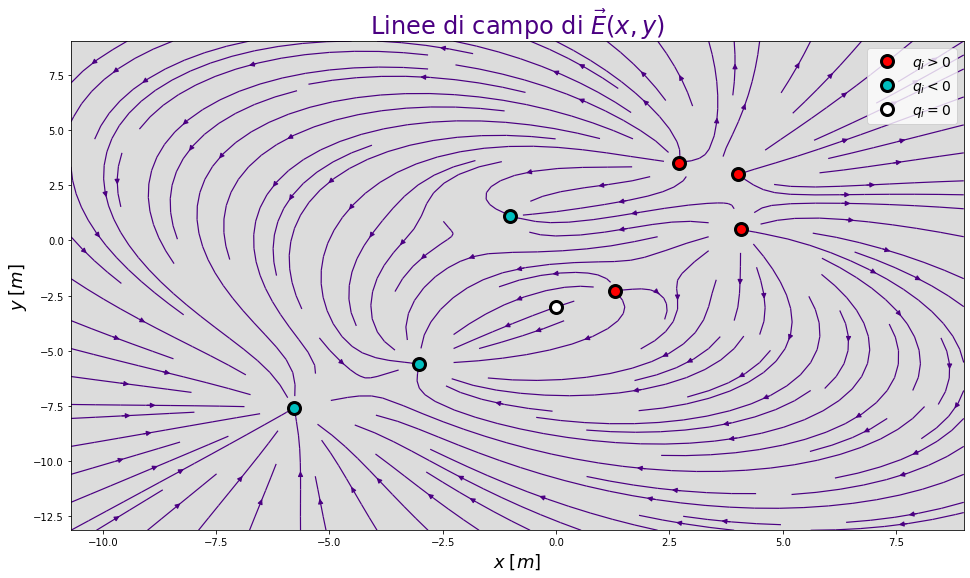

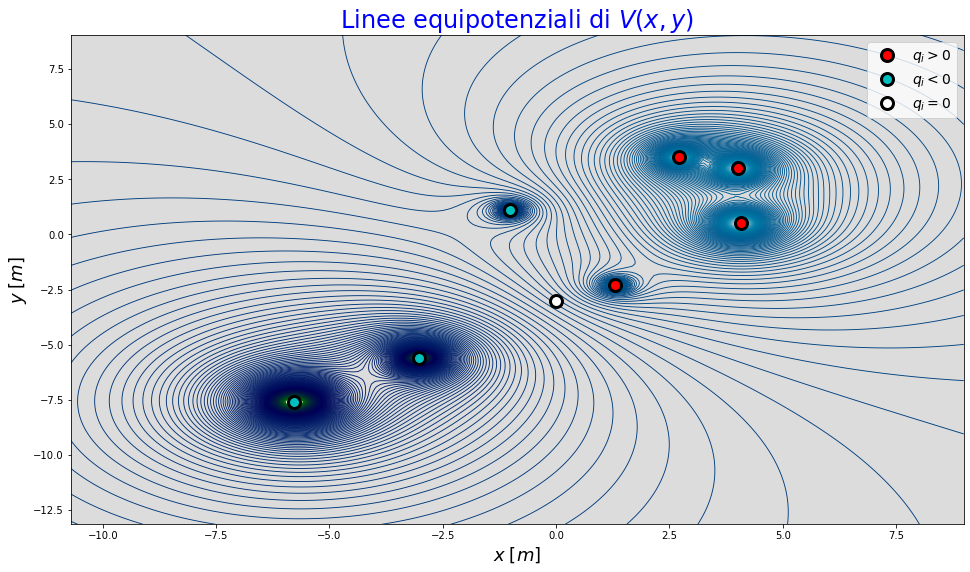

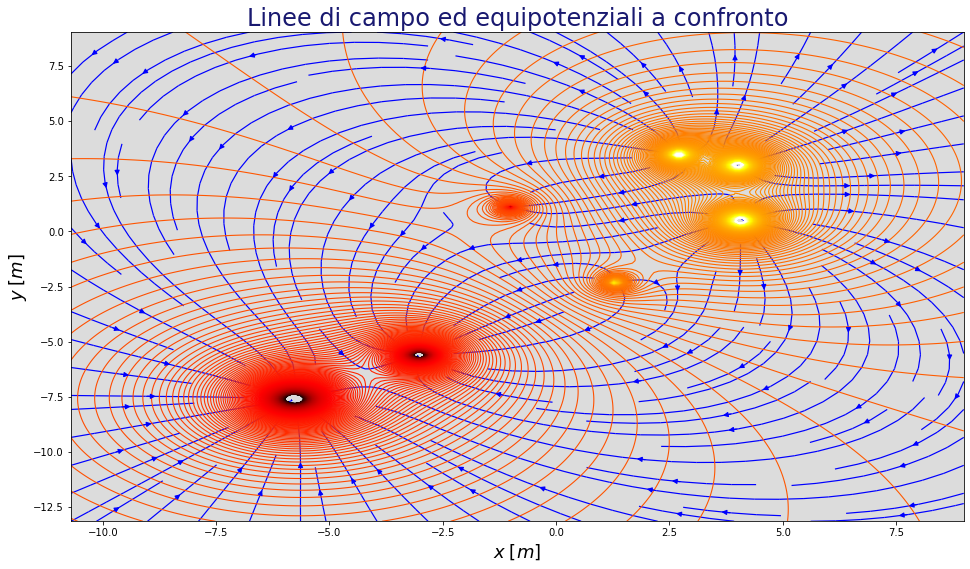

Tempo di esecuzione: 6.72 s


In [4]:
t=time()-t

plt.figure(figsize=(16, 9))
plt.axes().set_facecolor('gainsboro')
plt.title(r'Linee di campo di $\vec{E}(x,y)$', c='indigo', size=24)

plt.streamplot(X_array, Y_array, Ex_array, Ey_array, density=1.2, linewidth=1.2, color='indigo')
plt.plot(Xp, Yp, ' or', ms=12, mec='k', mew=3, label=r'$q_i > 0$')
plt.plot(Xn, Yn, ' oc', ms=12, mec='k', mew=3, label=r'$q_i < 0$')
plt.plot(X0, Y0, ' ow', ms=12, mec='k', mew=3, label=r'$q_i = 0$')

plt.xlim(x_m - Δx/2, x_M + Δx/2)
plt.ylim(y_m - Δy/2, y_M + Δy/2)
plt.xlabel(r'$x \; [m]$', size=18)
plt.ylabel(r'$y \; [m]$', size=18)
plt.legend(fontsize=14, loc='upper right')
plt.show()


plt.figure(figsize=(16, 9))
plt.axes().set_facecolor('gainsboro')
plt.title(r'Linee equipotenziali di $V(x,y)$', c='b', size=24)

plt.contour(X_array, Y_array, V_array, levels=np.linspace(-50,50,500), cmap='ocean', linewidths=.9)
plt.plot(Xp, Yp, ' or', ms=12, mec='k', mew=3, label=r'$q_i > 0$')
plt.plot(Xn, Yn, ' oc', ms=12, mec='k', mew=3, label=r'$q_i < 0$')
plt.plot(X0, Y0, ' ow', ms=12, mec='k', mew=3, label=r'$q_i = 0$')

plt.xlim(x_m - Δx/2, x_M + Δx/2)
plt.ylim(y_m - Δy/2, y_M + Δy/2)
plt.xlabel(r'$x \; [m]$', size=18)
plt.ylabel(r'$y \; [m]$', size=18)
plt.legend(fontsize=14, loc='upper right')
plt.show()


plt.figure(figsize=(16, 9))
plt.axes().set_facecolor('gainsboro')
plt.title(r'Linee di campo ed equipotenziali a confronto', c='midnightblue', size=24)

plt.streamplot(X_array, Y_array, Ex_array, Ey_array, density=1.2, linewidth=1.2, color='b')
plt.contour(X_array, Y_array, V_array, levels=np.linspace(-50,50,500), cmap='hot', linewidths=1.1)

plt.xlim(x_m - Δx/2, x_M + Δx/2)
plt.ylim(y_m - Δy/2, y_M + Δy/2)
plt.xlabel(r'$x \; [m]$', size=18)
plt.ylabel(r'$y \; [m]$', size=18)
plt.show()

t=time()-t
print('Tempo di esecuzione:','{0:.3g}'.format(t),'s')